In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,"gold settles higher recent downdraft, inflatio...",0.283333,0.116667,Positive
1,1,gloves wedding lace ivory bridalgown weddingdr...,0.600000,0.500000,Positive
2,2,boston happening tomorrow _music!! tickets now...,0.602273,-0.306818,Negative
3,3,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 4,784,000円 買取 4,7...",0.000000,0.000000,Neutral
4,4,"gold gains 1 percent dollar retreat, short-cov...",0.000000,0.000000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2018_rahip_brunson/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,40000,✅awax - finacial blockchain 💰💰💰 innovative wid...,0.666667,0.066667,Positive
1,40001,juuusssttt hair center (say like bob uecker ma...,0.255556,-0.068056,Negative
2,40002,"los videojuegos son vicio caro, asíque os trae...",0.750000,0.375000,Positive
3,40003,cryptocurrency price analysis bitsend bsd : ⬇️...,0.677273,-0.331818,Negative
4,40004,god trust pay cash! deadpresidents cash coin,0.000000,0.000000,Neutral


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [10]:
# Building model with transformer
model_name = 'google/electra-small-discriminator'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 33
	99percentile : 46


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 34
	99percentile : 34


In [12]:
# getting electra-base model.
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [14]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
2500/2500 [==============================] - 171s 58ms/step - loss: 0.2548 - accuracy: 0.9129 - val_loss: 0.4960 - val_accuracy: 0.8439
Epoch 2/5
2500/2500 [==============================] - 150s 58ms/step - loss: 0.0388 - accuracy: 0.9893 - val_loss: 0.6599 - val_accuracy: 0.8709
Epoch 3/5
2500/2500 [==============================] - 150s 58ms/step - loss: 0.0286 - accuracy: 0.9922 - val_loss: 0.6412 - val_accuracy: 0.8614
Epoch 4/5
2500/2500 [==============================] - 150s 58ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.4794 - val_accuracy: 0.9198
Epoch 5/5
2500/2500 [==============================] - 150s 58ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.4820 - val_accuracy: 0.9220


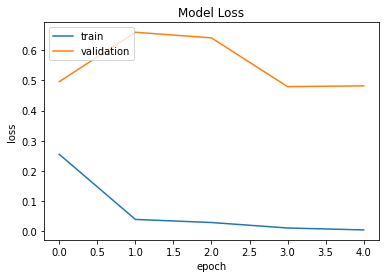

In [15]:
learner.plot('loss')

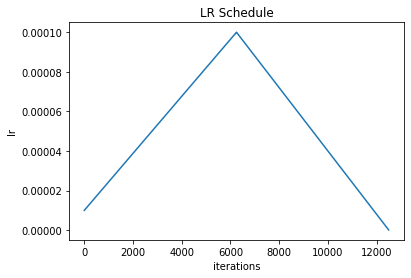

In [16]:
learner.plot('lr')

In [17]:
learner.validate()

175/175 [==============================] - 9s 34ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       736
           1       0.95      0.93      0.94      2650
           2       0.94      0.95      0.94      2214

    accuracy                           0.92      5600
   macro avg       0.89      0.90      0.89      5600
weighted avg       0.92      0.92      0.92      5600



array([[ 600,   90,   46],
       [  98, 2453,   99],
       [  65,   39, 2110]])